In [1]:
from __future__ import annotations
import random
import time
from typing import Callable

import numpy as np
import pandas as pd

import Data
from signature_mahalanobis_knn.utils import (
    compute_auc_given_dists,
)

from methods import (
    compute_signature_mahalanbois_knn_scores,
    compute_isolation_forest_scores_based_on_moments,
    compute_isolation_forest_scores_signatures,
    compute_local_outlier_factor_scores_based_on_moments,
    compute_local_outlier_factor_scores_signatures,
)

In [2]:
seed = 2023
random.seed(seed)
np.random.seed(seed)

bootstrap_samples = 10000

In [3]:
data = Data.Data(if_sample=False, random_seed=seed)

In [4]:
def ship_movement_experiment(
    data: Data.Data,
    depth: int | None,
    anomaly_detection_method: Callable[[Data.Data], dict[str, np.ndarray | float]],
    anomaly_detection_kwargs: dict | None = None,
    add_depth_to_kwargs: bool = False,
    plot: bool = False,
) -> dict[str, np.array | float]:
    t0 = time.time()

    if anomaly_detection_kwargs is None:
        anomaly_detection_kwargs = {}

    results_ship_movement = {
        "lead_lag": [],
        "time_diff": [],
        "inv_reset": [],
        "thres_distance": [],
        "auc": [],
        "se": [],
        "total_fit_time": [],
        "total_compute_score_time": [],
    }

    for lead_lag in [False, True]:
        for time_diff in [False, True]:
            for inv_reset in [False, True]:
                for thres_distance in [4000, 8000, 16000, 32000]:
                    # save hyperparameters for results
                    results_ship_movement["lead_lag"].append(lead_lag)
                    results_ship_movement["time_diff"].append(time_diff)
                    results_ship_movement["inv_reset"].append(inv_reset)
                    results_ship_movement["thres_distance"].append(thres_distance)

                    data.load_ship_movements(
                        include_time_diffs=time_diff,
                        lead_lag_transform=lead_lag,
                        invisibility_transform=inv_reset,
                        thres_distance=thres_distance,
                    )
                    print(
                        f"start lead_lag: {lead_lag}, "
                        f"time_diff: {time_diff}, "
                        f"inv_reset: {inv_reset}, "
                        f"threshold distance: {thres_distance}"
                    )

                    if add_depth_to_kwargs:
                        anomaly_detection_kwargs["depth"] = depth

                    # compute the inlier and outlier scores
                    results = anomaly_detection_method(data, **anomaly_detection_kwargs)

                    # plot and compute auc
                    auc, se = compute_auc_given_dists(
                        results["scores_inliers"],
                        results["scores_outliers"],
                        bootstrap=True,
                        bootstrap_samples=bootstrap_samples,
                        random_state=seed,
                        plot=plot,
                        title=(
                            f"\nthreshold distance: {thres_distance}\n"
                            f"lead_lag: {lead_lag} | "
                            f"time_diff: {time_diff} | "
                            f"inv_reset: {inv_reset}"
                        ),
                    )

                    # save results
                    results_ship_movement["auc"].append(auc)
                    results_ship_movement["se"].append(se)
                    results_ship_movement["total_fit_time"].append(results["fit_time"])
                    results_ship_movement["total_compute_score_time"].append(
                        results["compute_score_time"]
                    )

                    print(
                        f"lead_lag: {lead_lag}, "
                        f"time_diff: {time_diff}, "
                        f"inv_rest: {inv_reset}, "
                        f"thres_distance: {thres_distance} | "
                        f"auc: {auc}, "
                        f"se: {se}"
                    )

    total_time = time.time() - t0
    print(f"Total experiment time: {total_time} seconds | {total_time / 60} minutes")

    return results_ship_movement

## Signature Mahalanobis KNN

In [5]:
n_neighbours = 100

start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 1.652777910232544
compute_score_time: 3.4371819496154785


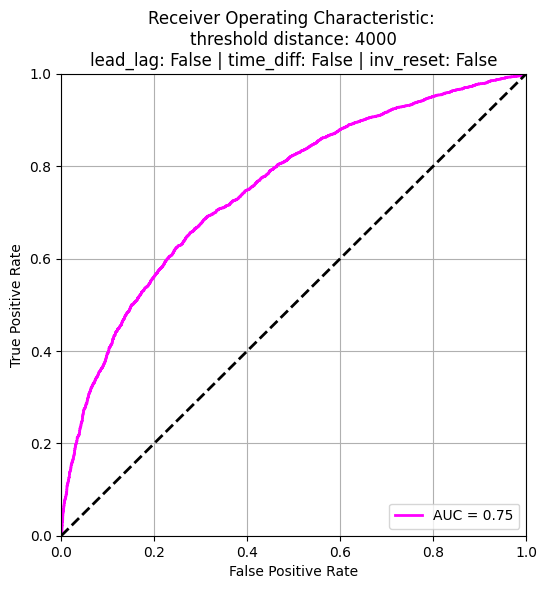

lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.749824, se: 0.004837384745939868
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 1.4892380237579346
compute_score_time: 3.206170082092285


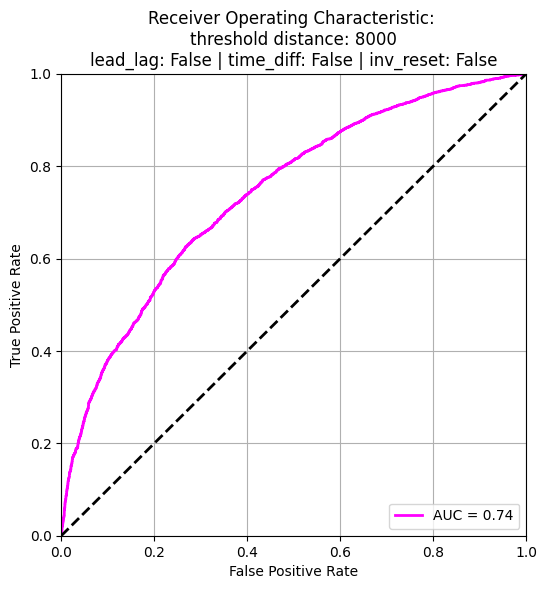

lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.7403874400000001, se: 0.004895296521201377
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 1.46596097946167
compute_score_time: 3.253856897354126


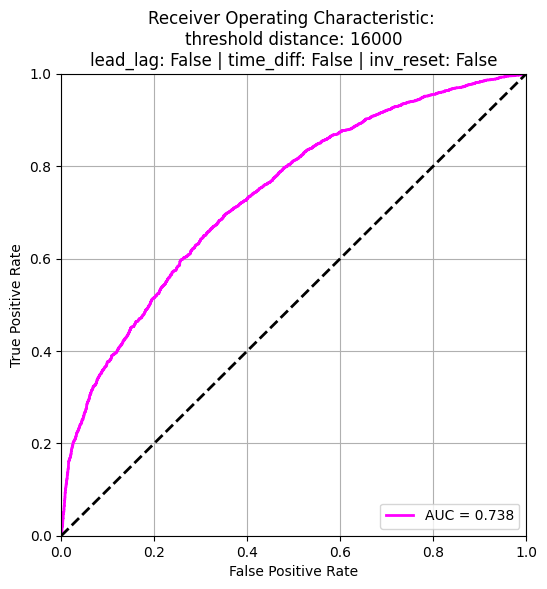

lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.7375581200000001, se: 0.004893467897193522
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 1.482384204864502
compute_score_time: 3.1141369342803955


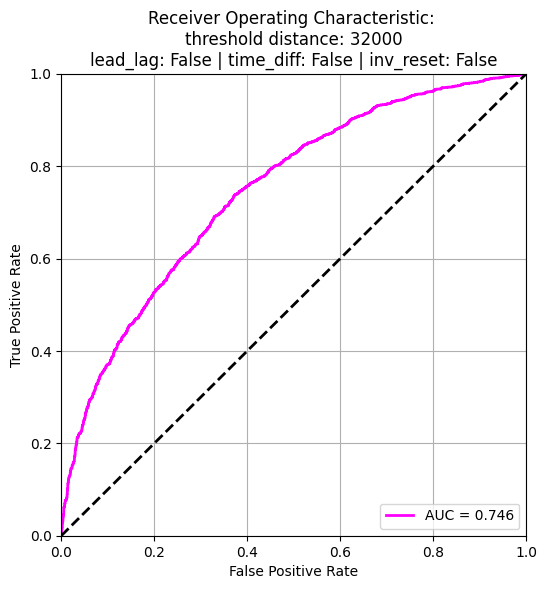

lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 32000 | auc: 0.74586848, se: 0.004837004780858864
start lead_lag: False, time_diff: False, inv_reset: True, threshold distance: 4000
fit_time: 1.8560340404510498
compute_score_time: 3.906435012817383


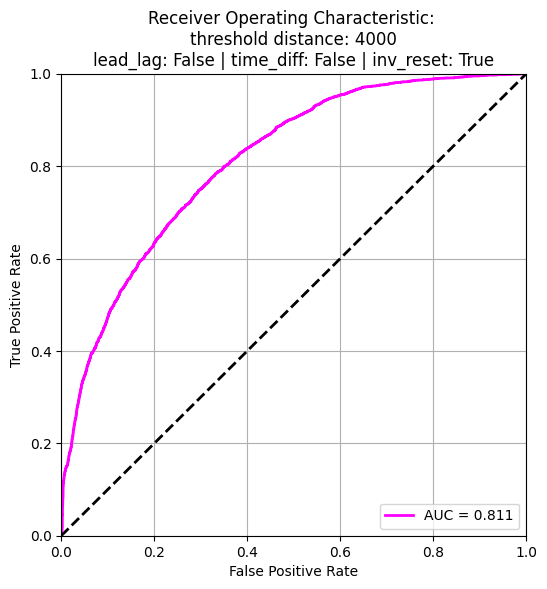

lead_lag: False, time_diff: False, inv_rest: True, thres_distance: 4000 | auc: 0.8109348, se: 0.004205510631925076
start lead_lag: False, time_diff: False, inv_reset: True, threshold distance: 8000
fit_time: 1.8324663639068604
compute_score_time: 3.482327938079834


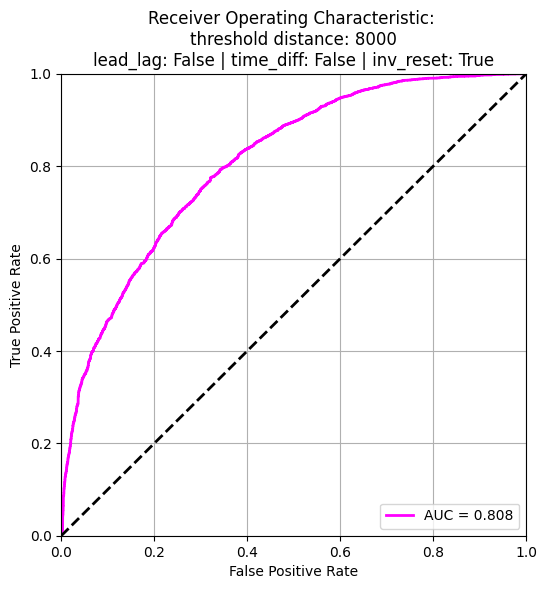

lead_lag: False, time_diff: False, inv_rest: True, thres_distance: 8000 | auc: 0.8082413599999999, se: 0.0042203409100409015
start lead_lag: False, time_diff: False, inv_reset: True, threshold distance: 16000
fit_time: 1.7972710132598877
compute_score_time: 3.5845677852630615


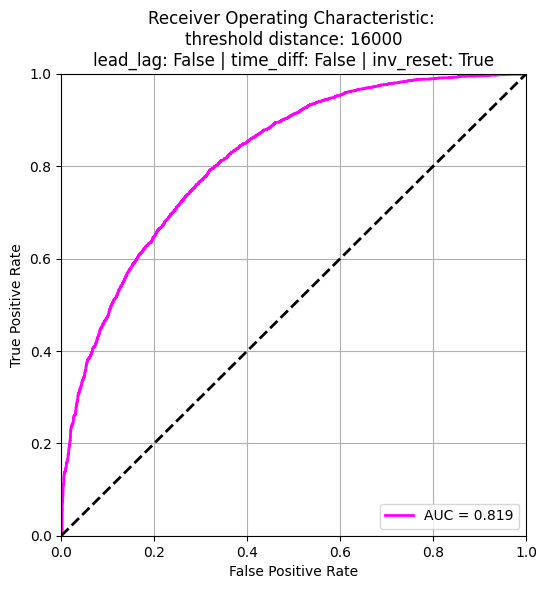

lead_lag: False, time_diff: False, inv_rest: True, thres_distance: 16000 | auc: 0.81860108, se: 0.004127371125966494
start lead_lag: False, time_diff: False, inv_reset: True, threshold distance: 32000
fit_time: 2.3285698890686035
compute_score_time: 4.420166015625


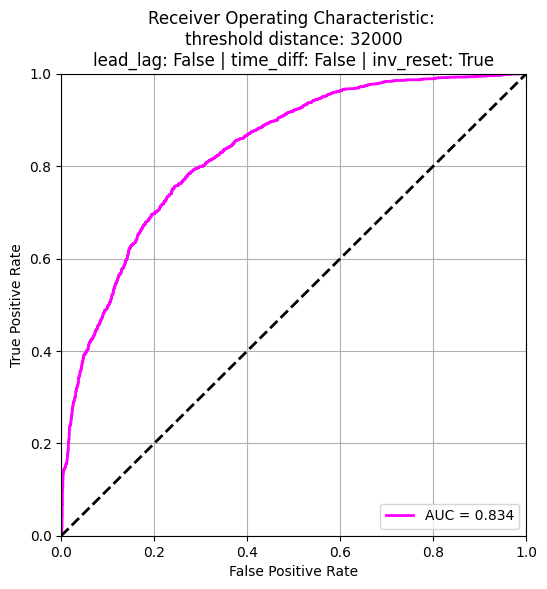

lead_lag: False, time_diff: False, inv_rest: True, thres_distance: 32000 | auc: 0.8339557200000001, se: 0.003947146426933389
start lead_lag: False, time_diff: True, inv_reset: False, threshold distance: 4000
fit_time: 1.939640760421753
compute_score_time: 3.5684731006622314


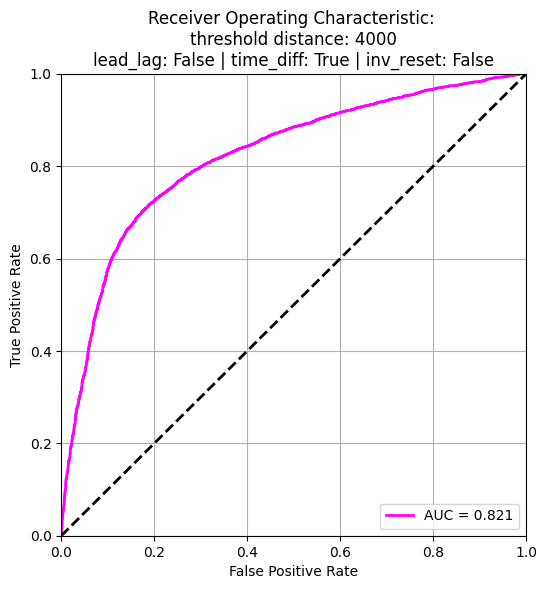

lead_lag: False, time_diff: True, inv_rest: False, thres_distance: 4000 | auc: 0.8208905599999999, se: 0.004251374906456238
start lead_lag: False, time_diff: True, inv_reset: False, threshold distance: 8000
fit_time: 1.8767359256744385
compute_score_time: 3.650024890899658


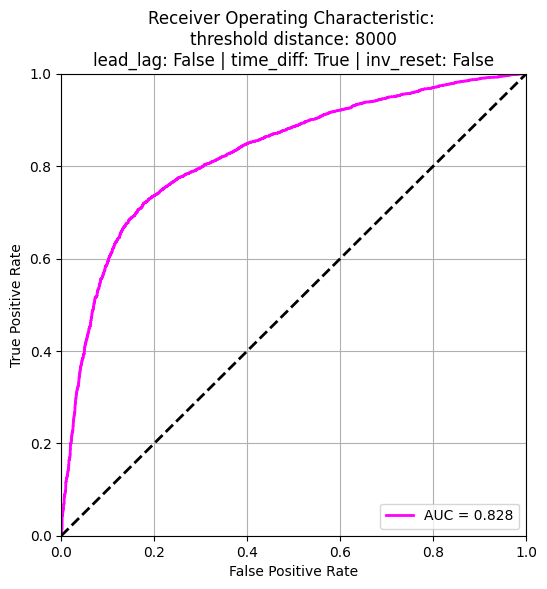

lead_lag: False, time_diff: True, inv_rest: False, thres_distance: 8000 | auc: 0.8282533999999999, se: 0.0041409693279119125
start lead_lag: False, time_diff: True, inv_reset: False, threshold distance: 16000
fit_time: 2.014075994491577
compute_score_time: 3.575536012649536


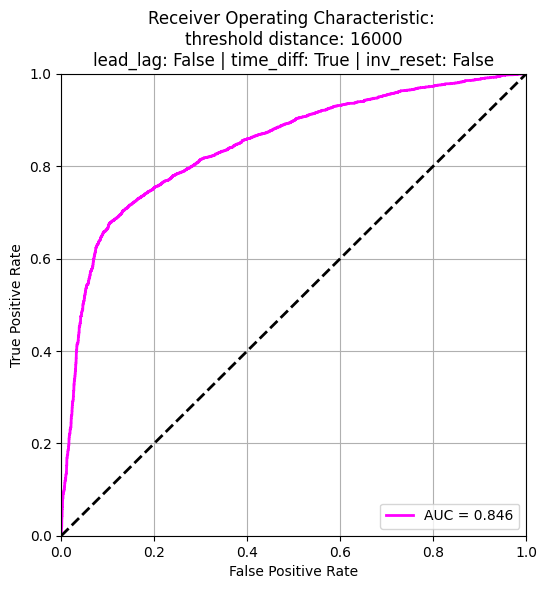

lead_lag: False, time_diff: True, inv_rest: False, thres_distance: 16000 | auc: 0.84593268, se: 0.0038892557250173564
start lead_lag: False, time_diff: True, inv_reset: False, threshold distance: 32000
fit_time: 1.9035730361938477
compute_score_time: 3.7040109634399414


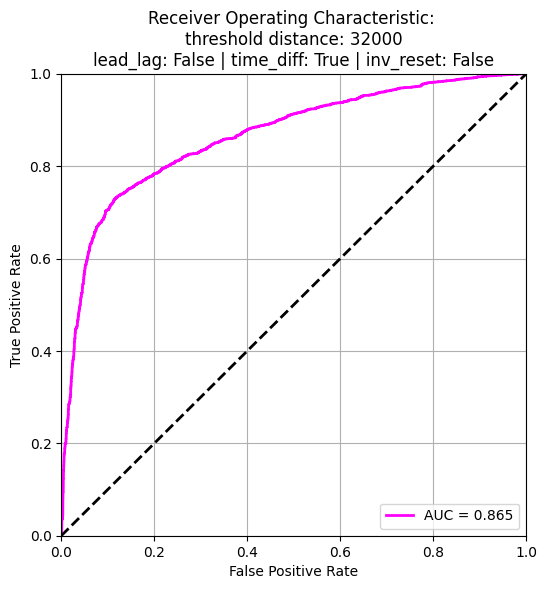

lead_lag: False, time_diff: True, inv_rest: False, thres_distance: 32000 | auc: 0.86457108, se: 0.003652676906496983
start lead_lag: False, time_diff: True, inv_reset: True, threshold distance: 4000
fit_time: 2.3146321773529053
compute_score_time: 6.448454856872559


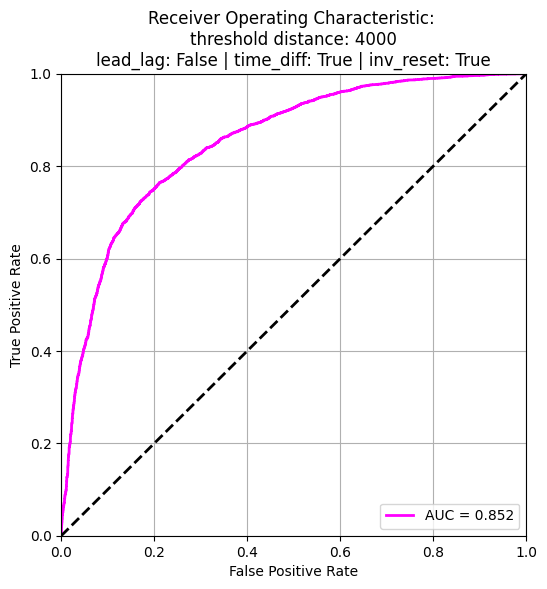

lead_lag: False, time_diff: True, inv_rest: True, thres_distance: 4000 | auc: 0.8521481199999998, se: 0.0037871493740208417
start lead_lag: False, time_diff: True, inv_reset: True, threshold distance: 8000
fit_time: 2.7138540744781494
compute_score_time: 7.29258918762207


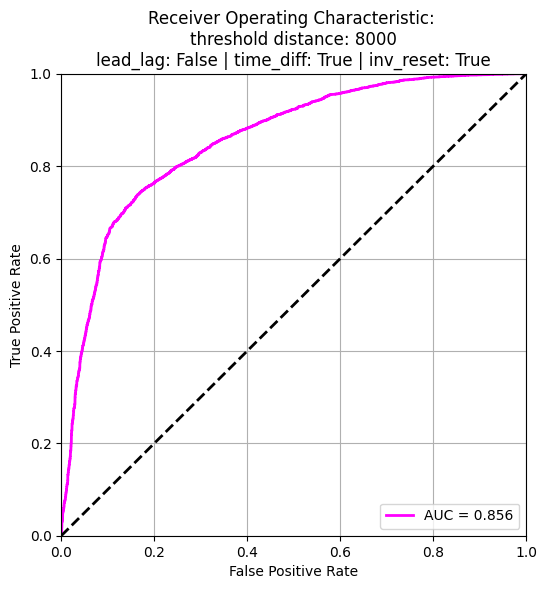

lead_lag: False, time_diff: True, inv_rest: True, thres_distance: 8000 | auc: 0.85581624, se: 0.0037202431229425587
start lead_lag: False, time_diff: True, inv_reset: True, threshold distance: 16000
fit_time: 2.7312052249908447
compute_score_time: 6.211560964584351


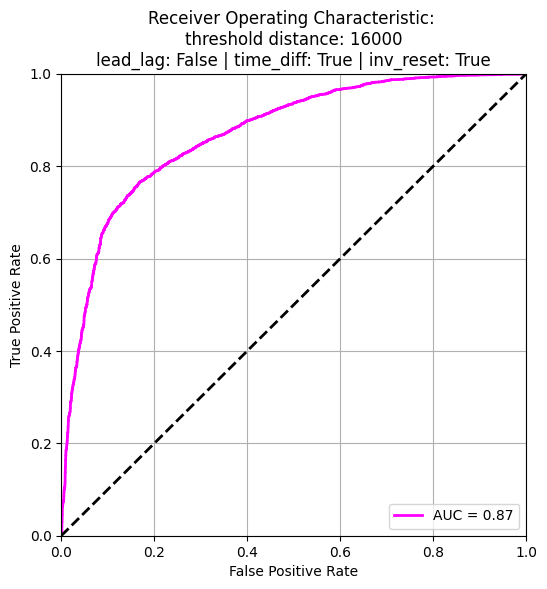

lead_lag: False, time_diff: True, inv_rest: True, thres_distance: 16000 | auc: 0.86993132, se: 0.003502594708212182
start lead_lag: False, time_diff: True, inv_reset: True, threshold distance: 32000
fit_time: 2.802006959915161
compute_score_time: 10.205099821090698


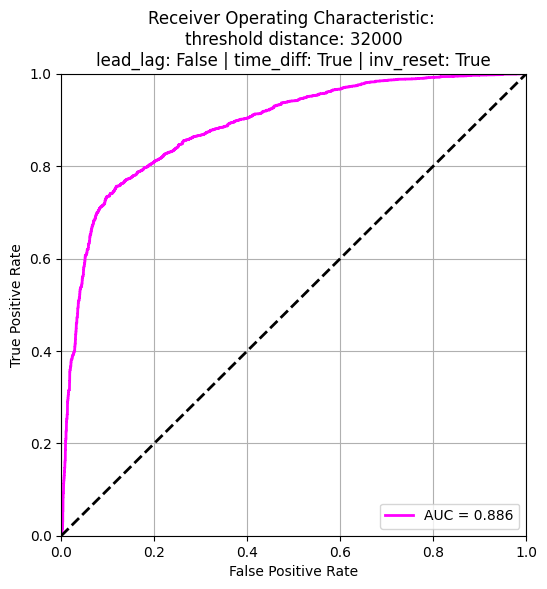

lead_lag: False, time_diff: True, inv_rest: True, thres_distance: 32000 | auc: 0.88638976, se: 0.003259427392945837
start lead_lag: True, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 2.2295749187469482
compute_score_time: 5.5110249519348145


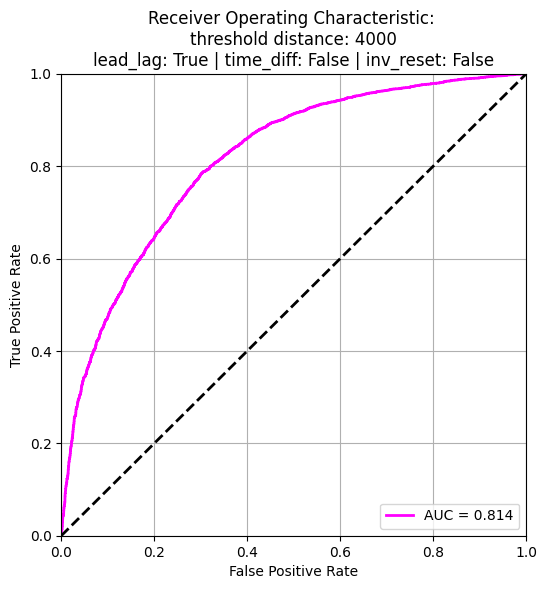

lead_lag: True, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.8138638, se: 0.00425462596198299
start lead_lag: True, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 2.423044204711914
compute_score_time: 6.593661069869995


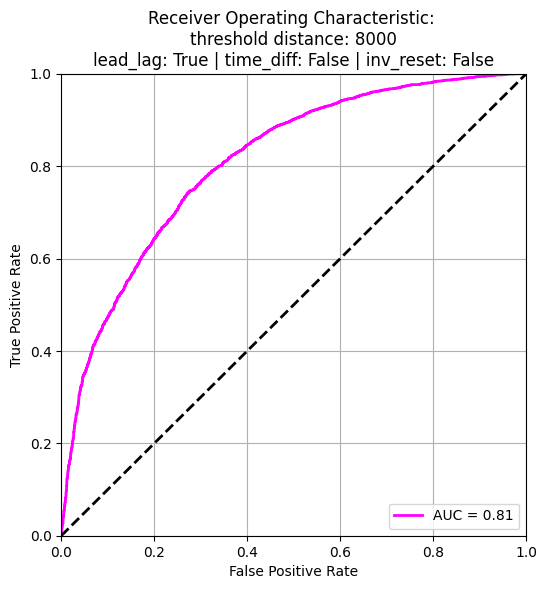

lead_lag: True, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.8097710399999999, se: 0.0042496297830104555
start lead_lag: True, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 2.292570114135742
compute_score_time: 6.530897855758667


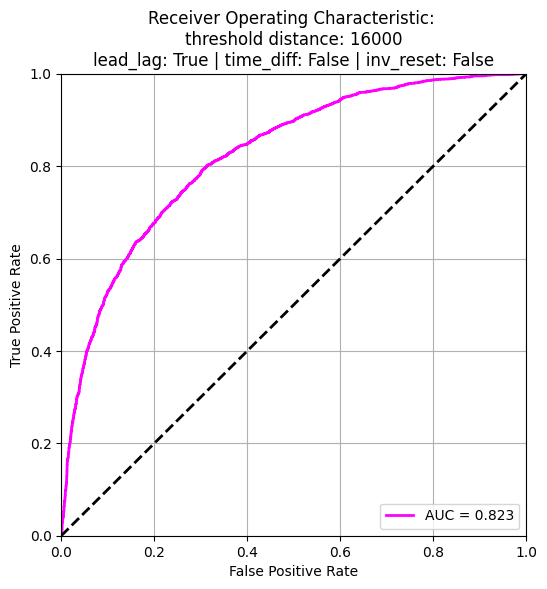

lead_lag: True, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.82269984, se: 0.00410555871882297
start lead_lag: True, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 2.428821086883545
compute_score_time: 7.525089979171753


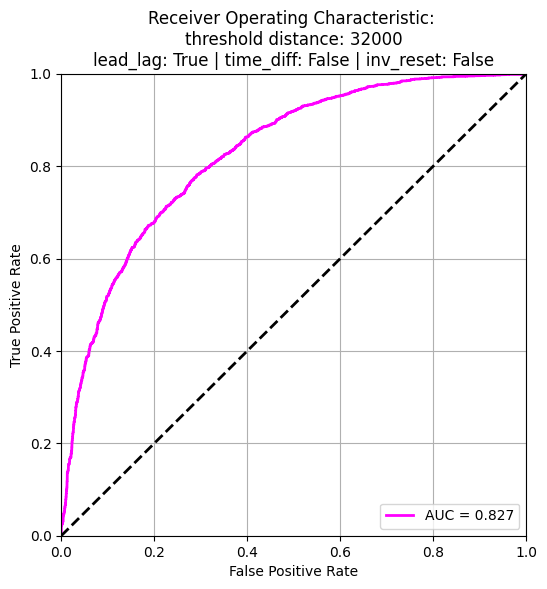

lead_lag: True, time_diff: False, inv_rest: False, thres_distance: 32000 | auc: 0.8265306399999999, se: 0.004074470042567456
start lead_lag: True, time_diff: False, inv_reset: True, threshold distance: 4000
fit_time: 2.7817389965057373
compute_score_time: 25.220913887023926


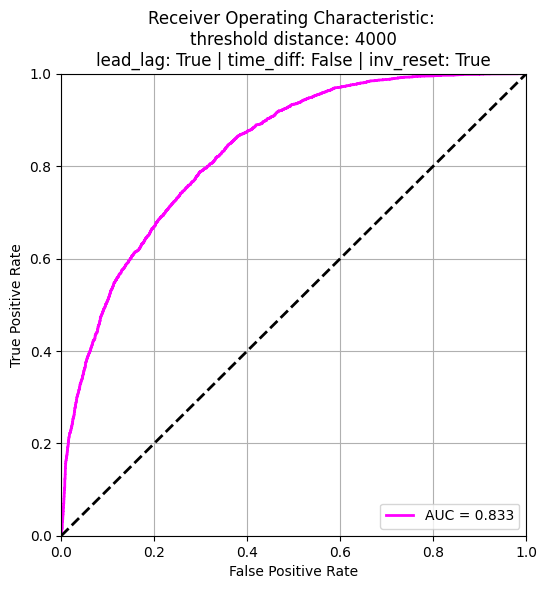

lead_lag: True, time_diff: False, inv_rest: True, thres_distance: 4000 | auc: 0.8327980800000001, se: 0.003933649172792885
start lead_lag: True, time_diff: False, inv_reset: True, threshold distance: 8000
fit_time: 2.8474197387695312
compute_score_time: 26.126667022705078


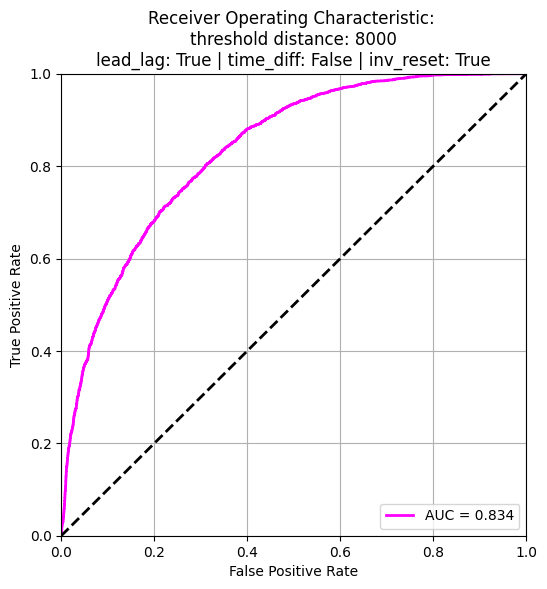

lead_lag: True, time_diff: False, inv_rest: True, thres_distance: 8000 | auc: 0.8335622399999999, se: 0.003936748741855798
start lead_lag: True, time_diff: False, inv_reset: True, threshold distance: 16000
fit_time: 2.7748889923095703
compute_score_time: 24.810657024383545


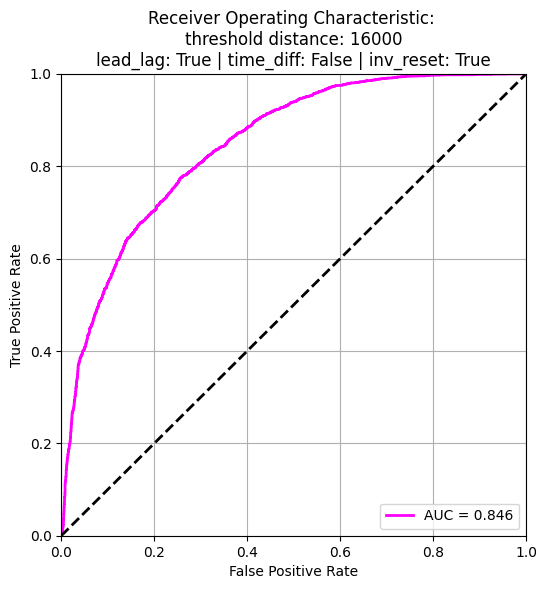

lead_lag: True, time_diff: False, inv_rest: True, thres_distance: 16000 | auc: 0.84599592, se: 0.003778110822218648
start lead_lag: True, time_diff: False, inv_reset: True, threshold distance: 32000
fit_time: 3.038058042526245
compute_score_time: 27.10634708404541


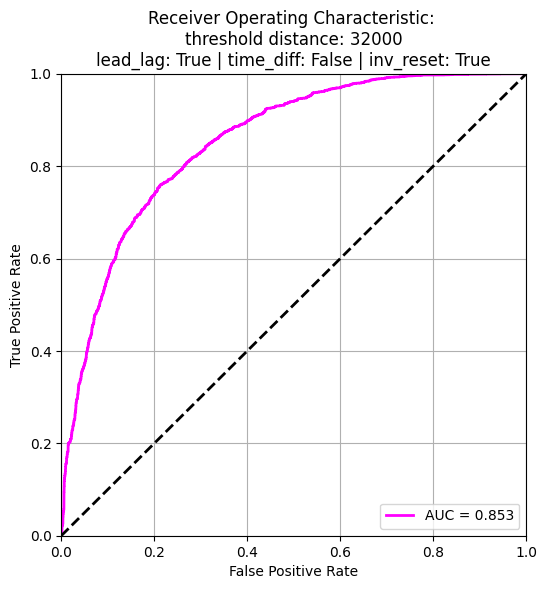

lead_lag: True, time_diff: False, inv_rest: True, thres_distance: 32000 | auc: 0.85275268, se: 0.003739068298792389
start lead_lag: True, time_diff: True, inv_reset: False, threshold distance: 4000
fit_time: 3.264695882797241
compute_score_time: 33.88766169548035


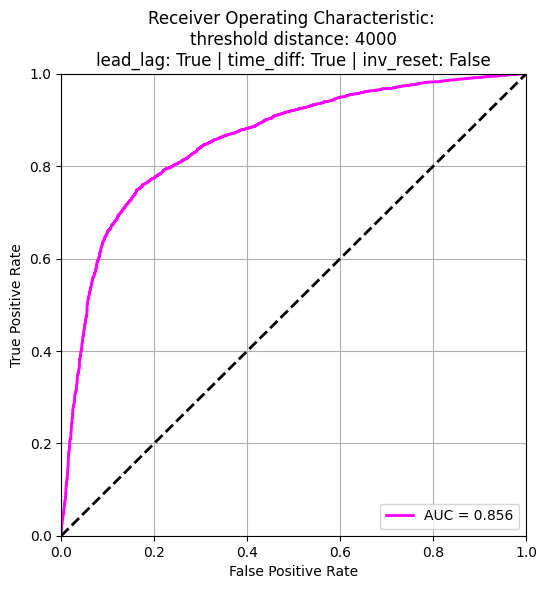

lead_lag: True, time_diff: True, inv_rest: False, thres_distance: 4000 | auc: 0.8562809999999998, se: 0.0038114586658959475
start lead_lag: True, time_diff: True, inv_reset: False, threshold distance: 8000
fit_time: 3.3261780738830566
compute_score_time: 31.15889811515808


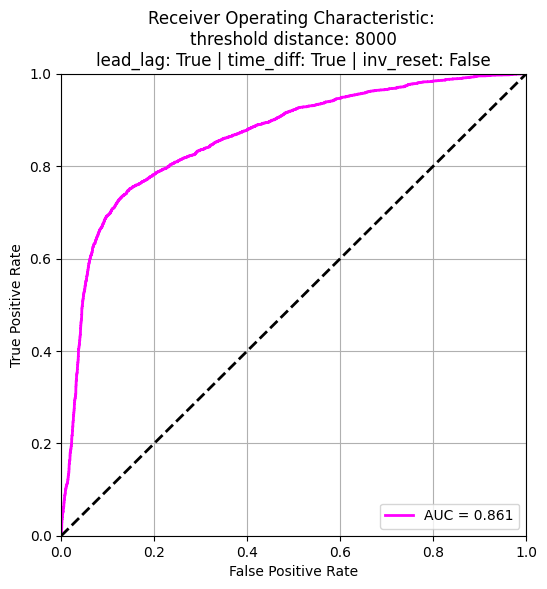

lead_lag: True, time_diff: True, inv_rest: False, thres_distance: 8000 | auc: 0.86130924, se: 0.003738850734581653
start lead_lag: True, time_diff: True, inv_reset: False, threshold distance: 16000
fit_time: 3.3290700912475586
compute_score_time: 40.08385992050171


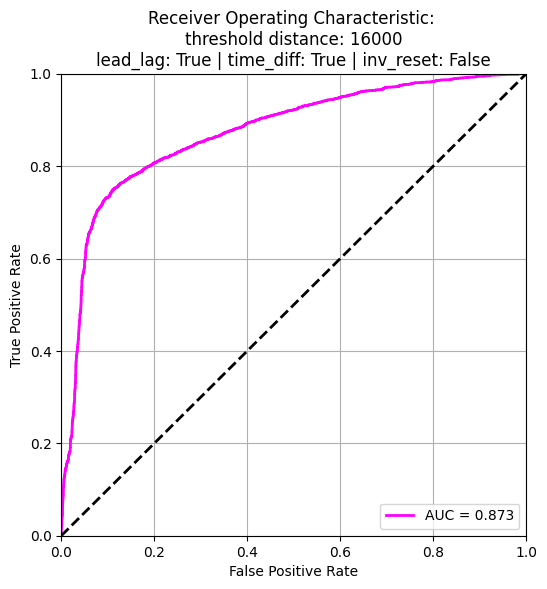

lead_lag: True, time_diff: True, inv_rest: False, thres_distance: 16000 | auc: 0.87346404, se: 0.0035630127944202327
start lead_lag: True, time_diff: True, inv_reset: False, threshold distance: 32000
fit_time: 3.584049940109253
compute_score_time: 33.47561192512512


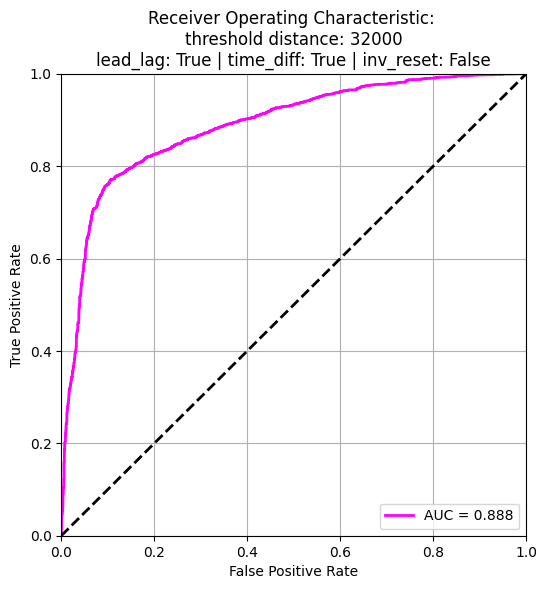

lead_lag: True, time_diff: True, inv_rest: False, thres_distance: 32000 | auc: 0.8875021599999999, se: 0.003323826304677217
start lead_lag: True, time_diff: True, inv_reset: True, threshold distance: 4000
fit_time: 3.914501190185547
compute_score_time: 47.81637001037598


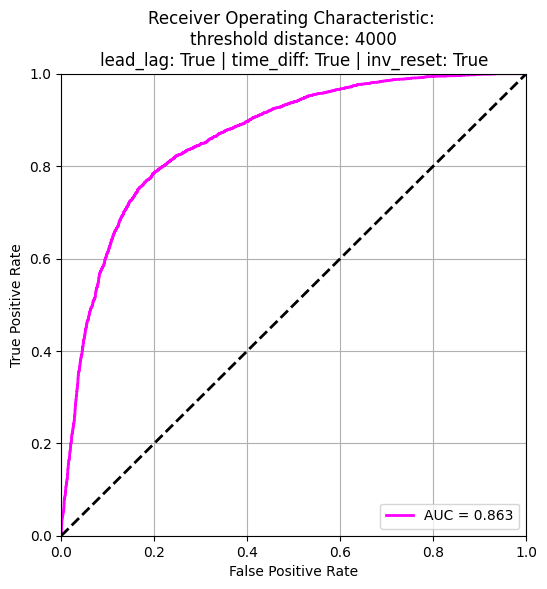

lead_lag: True, time_diff: True, inv_rest: True, thres_distance: 4000 | auc: 0.86295996, se: 0.0036640906970186143
start lead_lag: True, time_diff: True, inv_reset: True, threshold distance: 8000
fit_time: 3.7806739807128906
compute_score_time: 45.12883973121643


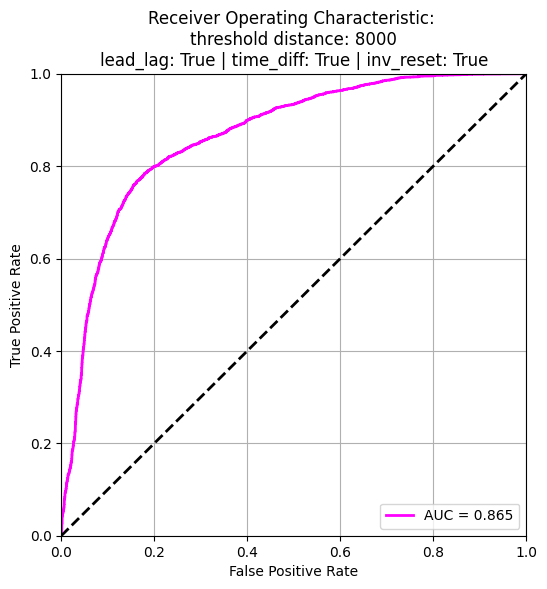

lead_lag: True, time_diff: True, inv_rest: True, thres_distance: 8000 | auc: 0.8654096800000001, se: 0.0036237003788902678
start lead_lag: True, time_diff: True, inv_reset: True, threshold distance: 16000
fit_time: 4.762589931488037
compute_score_time: 41.9513258934021


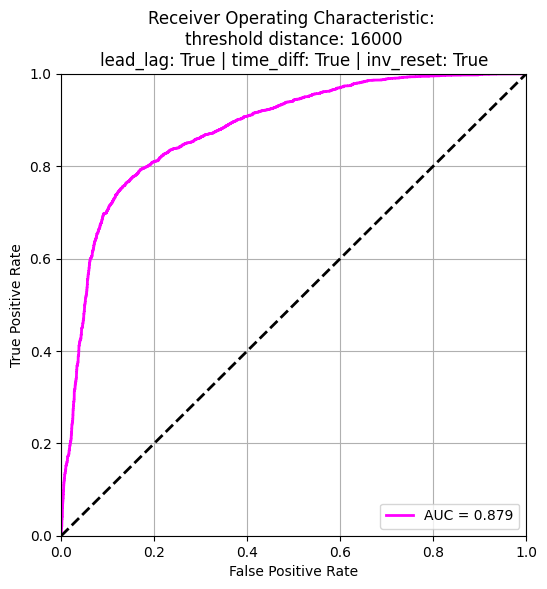

lead_lag: True, time_diff: True, inv_rest: True, thres_distance: 16000 | auc: 0.87949776, se: 0.0034037275439786144
start lead_lag: True, time_diff: True, inv_reset: True, threshold distance: 32000
fit_time: 3.941904067993164
compute_score_time: 42.78218698501587


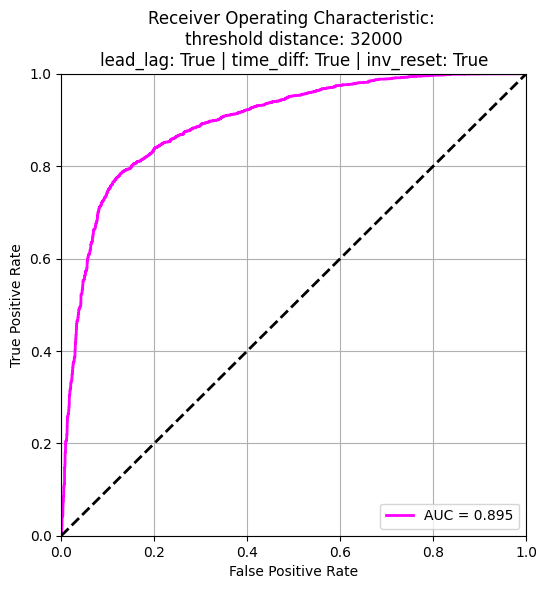

lead_lag: True, time_diff: True, inv_rest: True, thres_distance: 32000 | auc: 0.8946982, se: 0.0031513438666211663
Total experiment time: 1895.182186126709 seconds | 31.586369768778482 minutes


In [7]:
results_ship_movement_signature_mahalanobis_knn = ship_movement_experiment(
    data=data,
    depth=3,
    anomaly_detection_method=compute_signature_mahalanbois_knn_scores,
    anomaly_detection_kwargs={
        "knn_library": "sklearn",
        "n_neighbours": n_neighbours,
        "random_state": seed,
    },
    add_depth_to_kwargs=True,
    plot=True,
)

In [8]:
pd.DataFrame(results_ship_movement_signature_mahalanobis_knn)

,lead_lag,time_diff,inv_reset,thres_distance,auc,se,total_fit_time,total_compute_score_time
0,False,False,False,4000,0.749824,0.004837,1.652778,3.437182
1,False,False,False,8000,0.740387,0.004895,1.489238,3.206170
2,False,False,False,16000,0.737558,0.004893,1.465961,3.253857
3,False,False,False,32000,0.745868,0.004837,1.482384,3.114137
4,False,False,True,4000,0.810935,0.004206,1.856034,3.906435
5,False,False,True,8000,0.808241,0.004220,1.832466,3.482328
6,False,False,True,16000,0.818601,0.004127,1.797271,3.584568
7,False,False,True,32000,0.833956,0.003947,2.328570,4.420166
8,False,True,False,4000,0.820891,0.004251,1.939641,3.568473
9,False,True,False,8000,0.828253,0.004141,1.876736,3.650025


In [9]:
pd.DataFrame(results_ship_movement_signature_mahalanobis_knn).to_csv(
    "results/ship_movement_signature_mahalanobis_knn.csv"
)

## Baseline: Isolation Forest

### Using moments as features

In [10]:
results_ship_movement_isolation_forest_moments = ship_movement_experiment(
    data=data,
    depth=None,
    anomaly_detection_method=compute_isolation_forest_scores_based_on_moments,
    anomaly_detection_kwargs={"random_state": seed},
    add_depth_to_kwargs=False,
    plot=False,
)

start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 0.056285858154296875
compute_score_time: 0.042137861251831055
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.71437284, se: 0.005143804183972085
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 0.05273795127868652
compute_score_time: 0.03856611251831055
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.7119333000000001, se: 0.0051237195028698106
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 0.052256107330322266
compute_score_time: 0.039340972900390625
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.72737242, se: 0.005020696377643174
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 0.051056861877441406
compute_score_time: 0.035720109939575195
lead_lag: False

In [11]:
pd.DataFrame(results_ship_movement_isolation_forest_moments)

,lead_lag,time_diff,inv_reset,thres_distance,auc,se,total_fit_time,total_compute_score_time
0,False,False,False,4000,0.714373,0.005144,0.056286,0.042138
1,False,False,False,8000,0.711933,0.005124,0.052738,0.038566
2,False,False,False,16000,0.727372,0.005021,0.052256,0.039341
3,False,False,False,32000,0.727155,0.005020,0.051057,0.035720
4,False,False,True,4000,0.780501,0.004554,0.053277,0.037242
5,False,False,True,8000,0.784672,0.004591,0.053071,0.039010
6,False,False,True,16000,0.776124,0.004667,0.054809,0.035046
7,False,False,True,32000,0.790257,0.004564,0.053977,0.036386
8,False,True,False,4000,0.767159,0.004765,0.054321,0.033840
9,False,True,False,8000,0.771663,0.004690,0.053713,0.035011


In [12]:
pd.DataFrame(results_ship_movement_isolation_forest_moments).to_csv(
    "results/ship_movement_isolation_forest_moments.csv"
)

### Using path signatures as features

In [13]:
results_ship_movement_isolation_forest_signatures = ship_movement_experiment(
    data=data,
    depth=3,
    anomaly_detection_method=compute_isolation_forest_scores_signatures,
    anomaly_detection_kwargs={"random_state": seed},
    add_depth_to_kwargs=True,
    plot=False,
)

start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 0.05830693244934082
compute_score_time: 0.051526784896850586
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.6268689199999999, se: 0.005625357259131739
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 0.05159711837768555
compute_score_time: 0.04204893112182617
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.6225044799999999, se: 0.00562516000371904
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 0.05271291732788086
compute_score_time: 0.03877687454223633
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.64450962, se: 0.005478967964336971
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 0.05179905891418457
compute_score_time: 0.040194034576416016
lead_lag: Fal

In [14]:
pd.DataFrame(results_ship_movement_isolation_forest_signatures)

,lead_lag,time_diff,inv_reset,thres_distance,auc,se,total_fit_time,total_compute_score_time
0,False,False,False,4000,0.626869,0.005625,0.058307,0.051527
1,False,False,False,8000,0.622504,0.005625,0.051597,0.042049
2,False,False,False,16000,0.644510,0.005479,0.052713,0.038777
3,False,False,False,32000,0.660141,0.005438,0.051799,0.040194
4,False,False,True,4000,0.686408,0.005291,0.055239,0.041383
5,False,False,True,8000,0.701172,0.005210,0.055451,0.046631
6,False,False,True,16000,0.715046,0.005104,0.057417,0.040171
7,False,False,True,32000,0.717557,0.005095,0.057810,0.040742
8,False,True,False,4000,0.731353,0.005055,0.053147,0.037832
9,False,True,False,8000,0.714342,0.005138,0.051771,0.038045


In [15]:
pd.DataFrame(results_ship_movement_isolation_forest_signatures).to_csv(
    "results/ship_movement_isolation_forest_signatures.csv"
)

## Baseline: Local Outlier Factor


### Using moments as features

In [16]:
results_ship_movement_local_outlier_factor_moments = ship_movement_experiment(
    data=data,
    depth=None,
    anomaly_detection_method=compute_local_outlier_factor_scores_based_on_moments,
    anomaly_detection_kwargs={"n_neighbors": n_neighbours},
    add_depth_to_kwargs=False,
    plot=False,
)

start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 0.17626094818115234
compute_score_time: 0.0001628398895263672
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.54263728, se: 0.005785654503409075
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 0.16921377182006836
compute_score_time: 0.0001709461212158203
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.541594, se: 0.005783365981755112
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 0.16814208030700684
compute_score_time: 2.5987625122070312e-05
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.52233212, se: 0.005814201871838832
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 0.16188287734985352
compute_score_time: 2.09808349609375e-05
lead_lag: False, time_di

In [17]:
pd.DataFrame(results_ship_movement_local_outlier_factor_moments)

,lead_lag,time_diff,inv_reset,thres_distance,auc,se,total_fit_time,total_compute_score_time
0,False,False,False,4000,0.542637,0.005786,0.176261,0.000163
1,False,False,False,8000,0.541594,0.005783,0.169214,0.000171
2,False,False,False,16000,0.522332,0.005814,0.168142,0.000026
3,False,False,False,32000,0.513221,0.005776,0.161883,0.000021
4,False,False,True,4000,0.555082,0.005691,0.252179,0.000175
5,False,False,True,8000,0.585062,0.005732,0.242853,0.000174
6,False,False,True,16000,0.564085,0.005760,0.239516,0.000032
7,False,False,True,32000,0.534812,0.005778,0.233388,0.000020
8,False,True,False,4000,0.547099,0.005791,0.202122,0.000025
9,False,True,False,8000,0.542884,0.005782,0.186569,0.000021


In [18]:
pd.DataFrame(results_ship_movement_local_outlier_factor_moments).to_csv(
    "results/ship_movement_local_outlier_factor_moments.csv"
)

### Using path signatures as features

In [19]:
results_ship_movement_local_outlier_factor_signatures = ship_movement_experiment(
    data=data,
    depth=3,
    anomaly_detection_method=compute_local_outlier_factor_scores_signatures,
    anomaly_detection_kwargs={"n_neighbors": n_neighbours},
    add_depth_to_kwargs=True,
    plot=False,
)

start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 4000
fit_time: 0.21697711944580078
compute_score_time: 4.076957702636719e-05
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 4000 | auc: 0.48361208, se: 0.005747371156857112
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 8000
fit_time: 0.19842004776000977
compute_score_time: 2.288818359375e-05
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 8000 | auc: 0.5002137600000001, se: 0.005737791868719882
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 16000
fit_time: 0.1875462532043457
compute_score_time: 2.002716064453125e-05
lead_lag: False, time_diff: False, inv_rest: False, thres_distance: 16000 | auc: 0.49101138, se: 0.005779904995239717
start lead_lag: False, time_diff: False, inv_reset: False, threshold distance: 32000
fit_time: 0.18355202674865723
compute_score_time: 2.9087066650390625e-05
lead_lag: False, 

In [20]:
pd.DataFrame(results_ship_movement_local_outlier_factor_signatures)

,lead_lag,time_diff,inv_reset,thres_distance,auc,se,total_fit_time,total_compute_score_time
0,False,False,False,4000,0.483612,0.005747,0.216977,0.000041
1,False,False,False,8000,0.500214,0.005738,0.198420,0.000023
2,False,False,False,16000,0.491011,0.005780,0.187546,0.000020
3,False,False,False,32000,0.491787,0.005827,0.183552,0.000029
4,False,False,True,4000,0.564567,0.005749,0.365794,0.000226
5,False,False,True,8000,0.572405,0.005752,0.178377,0.000058
6,False,False,True,16000,0.561584,0.005750,0.192657,0.000206
7,False,False,True,32000,0.519609,0.005800,0.171263,0.000035
8,False,True,False,4000,0.511135,0.005706,0.163647,0.000032
9,False,True,False,8000,0.505437,0.005747,0.190598,0.000031


In [21]:
pd.DataFrame(results_ship_movement_local_outlier_factor_signatures).to_csv(
    "results/ship_movement_local_outlier_factor_signatures.csv"
)